In [1]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

# Exercice 1

## Question 2

In [2]:
from scipy.special import binom

def fonction_repartition(L):
    return sum([binom(3000,k) * (1/1000)**k * (999/1000)**(3000-k) for k in range(L+1)])
    

## Question 3

In [3]:
[fonction_repartition(k) for k in [3,5,7]]

[np.float64(0.6472319074710677),
 np.float64(0.9161829384230475),
 np.float64(0.9881386879686851)]

## Question 4

In [4]:
def nombre_pannes():
    return np.sum(random.random(size=3000) < 1/1000)


[nombre_pannes() for _ in range(10)]

[np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(4),
 np.int64(4)]

## Question 5

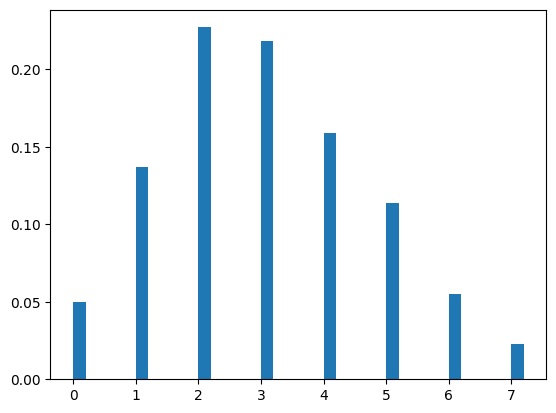

In [5]:
simulations = [nombre_pannes() for k in range(1000)]    
fig, ax = plt.subplots()
ax.bar(np.arange(8), [simulations.count(i)/1000 for i in range(8)], width=0.2, align="edge")
plt.show()

## Question 6

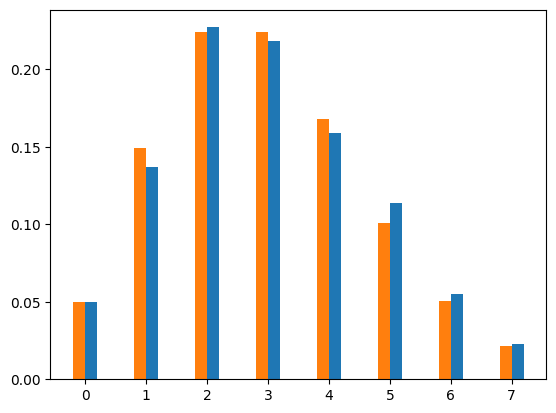

In [6]:
from scipy.special import factorial
fig, ax = plt.subplots()
ax.bar(np.arange(8), [simulations.count(i)/1000 for i in range(8)], width=0.2, align="edge")
ax.bar(np.arange(8), [np.exp(-3)*(3**k) / factorial(k) for k in range(8)], width=-0.2, align="edge")
plt.show()

# Exercice 2

## Question 1

In [7]:
P = np.array([[0.5,0.3,0.2],[0.2,0.5,0.3],[0.3,0.3,0.4]])

In [8]:
def verifier_stochastique(P):
    return bool(np.all(np.isclose(np.sum(P, axis=1),1)))

In [9]:
verifier_stochastique(P)

True

## Question 2

Pour trouver la loi invariante, on doit résoudre l'équation $\pi P = \pi$. Ce système linéaire a pour ensemble de solutions un espace vectoriel au moins de dimension $1$, donc on peut se contenter des deux premières lignes. On impose par ailleurs $\pi(0) + \pi(1) + \pi(2) = 1$.

In [10]:
Q = np.array([[-0.5,0.2,0.3],[0.3,-0.5,0.3],[1,1,1]]) 
np.linalg.solve(Q, np.array([[0],[0],[1]]))

array([[0.328125],
       [0.375   ],
       [0.296875]])

On reconnaît les nombres rationnels $\frac{21}{64}$, $\frac{3}{8}$ et $\frac{19}{24}$. Le programme suivant vérifie que le vecteur $\pi$ obtenu est bien la loi stationnaire :

In [11]:
pi = np.array([21/64,3/8,19/64])
np.matmul(pi, P) - pi

array([0., 0., 0.])

## Question 3

In [12]:
np.linalg.eigvals(P)

array([1. +0.00000000e+00j, 0.2+1.65827818e-09j, 0.2-1.65827818e-09j])

On vérifie que le polynôme caractéristique de $P$ est $(X-1)(X-0.2)^2$.

## Question 4

In [13]:
Q = np.array([[0.3,0.2,0.3],[0.3,0.3,0.3],[1,0,0]]) 
np.linalg.solve(Q, np.array([[0],[0],[1]]))

array([[ 1.],
       [ 0.],
       [-1.]])

In [14]:
nu = np.array([1,0,-1])
np.matmul(nu, P) - 0.2*nu

array([0., 0., 0.])

In [15]:
Q = np.array([[0.3,0.2,0.3],[0.3,0.3,0.3],[1,0,0]]) 
np.linalg.solve(Q, np.array([[0.2],[0],[1]]))

array([[ 1.],
       [-2.],
       [ 1.]])

In [21]:
mu = np.array([1,-2,1])
np.matmul(mu, P) - 0.2*(mu+nu)

array([0.00000000e+00, 0.00000000e+00, 1.11022302e-16])

Les vecteurs $\pi$, $\nu$ et $\mu$ forment une base de $\mathbb{R}^3$.

## Question 5

Si $\pi_0 = c \,\pi + a\, \nu + b \,\mu$ (cette décomposition existe car on a une base), alors on montre par récurrence que pour tout $n \geq 0$,
$\pi_n = c\,\pi + \alpha^n \,((a+bn)\,\nu + b\,\mu)$. En effet, si le résultat est vrai au rang $n$, alors au rang $n+1$,
$$\pi_{n+1} = \pi_n P = c \,\pi P+ \alpha^n\, ((a+bn)\,\nu P + b\,\mu P) =  c \,\pi + \alpha^{n+1} \,((a+b(n+1))\,\nu  + b\,\mu ).$$
Comme $\alpha=0.2<1$, on a donc $\lim_{n \to \infty}\pi_n = c\,\pi$. Par continuité de la fonction qui à un vecteur de $\mathbb{R}^3$ associe la somme de ses coefficients, $c=1$, car $\pi_n$ et $\pi$ ont pour somme $1$. La loi au temps $n$ tend donc vers la loi stationnaire lorsque $n$ tend vers l'infini.

## Questions 6, 7, 8

In [17]:
def markov(n, i, P):
    state = i
    res = np.zeros(n)
    for t in range(n):
        state = random.choice(P.shape[0], p=P[state])
        res[t] = state
    return res
    

In [18]:
M = markov(10000,0,P)
M

array([0., 0., 1., ..., 1., 0., 2.])

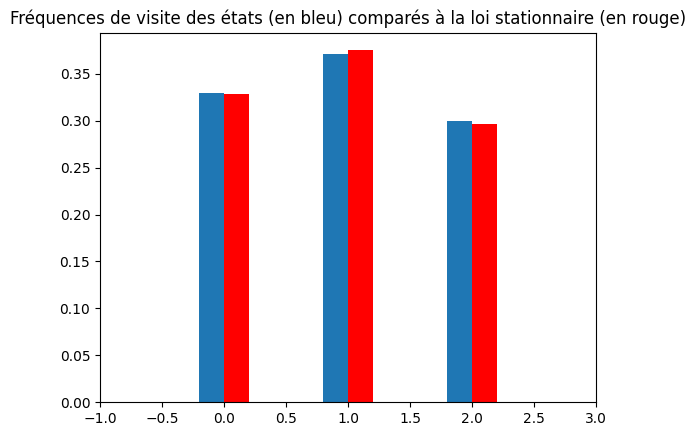

In [19]:
fig, ax = plt.subplots()
ax.bar([0,1,2], [np.count_nonzero(M==i)/10000 for i in [0,1,2]],  width=-0.2, align="edge")
ax.bar([0,1,2],[21/64,3/8,19/64], color="r", width=0.2, align="edge")
ax.set_xlim(-1,3)
ax.set_title("Fréquences de visite des états (en bleu) comparés à la loi stationnaire (en rouge)")
plt.show()